In [1]:
# =========================
# Cell 1 — Imports + generate data
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional but convenient (pairplot)
import seaborn as sns

from risk_dataset_generator import generate_company_risk_dataset

# Generate dataset
N = 5000
SEED = 0
OUTLIER_PROB = 0.002

# Full dataset (includes hidden columns) for QA
df = generate_company_risk_dataset(
    n=N,
    seed=SEED,
    outlier_prob=OUTLIER_PROB,
    return_all_columns=True,
)

df_students = generate_company_risk_dataset(
    n=N,
    seed=SEED,
    outlier_prob=OUTLIER_PROB,
    return_all_columns=False,
)

print(df.shape, df_students.shape)
df.head()


(5000, 20) (5000, 10)


,annual_revenue_eur,_profit_margin_raw,annual_costs_eur,size_score,audited,clients,top_client_share,market_focus,employees,ceo_tenure_years,cost_exposure,customer_concentration,profit_margin,sales_risk,cost_risk,sales_flag,cost_flag,y,risk [target],risk_score_external
0,4.082113e+06,0.083107,3.839930e+06,0.536962,1.0,222,0.168444,"[regulated, ads_marketplace, subscription]",6,16.964128,0.499690,0.025973,0.059328,0.321516,1.102706,0,0,0,healthy,34.278929
1,3.231172e+05,0.041536,2.867766e+05,0.169787,1.0,13,0.381770,"[ads_marketplace, consumer_retail]",3,13.707732,0.743585,0.145050,0.112469,0.846626,1.300912,0,0,0,healthy,42.977036
2,6.651515e+04,0.350000,3.947734e+04,0.000000,1.0,12,0.528989,[ads_marketplace],3,3.947865,0.550479,0.278601,0.406491,0.916241,0.929129,1,0,1,sales_risk,42.398162
3,5.618015e+04,-0.001334,5.041165e+04,0.000000,0.0,21,0.710439,"[consumer_retail, subscription]",3,21.328042,0.487472,0.500701,0.102679,1.617749,1.508618,1,1,3,both_risks,71.478452
4,1.379783e+07,-0.016450,1.405640e+07,0.713270,1.0,778,0.239214,"[ads_marketplace, B2B_contracts]",44,14.774588,0.842366,0.041937,-0.018740,0.644563,1.288536,0,0,0,healthy,40.946471


In [2]:
# =========================
# Cell 2 — Column overview + missingness
# =========================
print("Columns:")
print(df.columns.tolist())

print("\nMissingness (top 20):")
na_rate = df.isna().mean().sort_values(ascending=False)
print(na_rate.head(20))

# Count invalid audited values (should exist due to outliers)
if "audited" in df.columns:
    audited_numeric = pd.to_numeric(df["audited"], errors="coerce")
    invalid_audited = (~audited_numeric.isin([0, 1])) & audited_numeric.notna()
    print("\nInvalid audited count:", int(invalid_audited.sum()))


Columns:
['annual_revenue_eur', '_profit_margin_raw', 'annual_costs_eur', 'size_score', 'audited', 'clients', 'top_client_share', 'market_focus', 'employees', 'ceo_tenure_years', 'cost_exposure', 'customer_concentration', 'profit_margin', 'sales_risk', 'cost_risk', 'sales_flag', 'cost_flag', 'y', 'risk [target]', 'risk_score_external']

Missingness (top 20):
risk_score_external       0.0002
audited                   0.0002
annual_revenue_eur        0.0000
_profit_margin_raw        0.0000
size_score                0.0000
annual_costs_eur          0.0000
top_client_share          0.0000
clients                   0.0000
employees                 0.0000
ceo_tenure_years          0.0000
cost_exposure             0.0000
market_focus              0.0000
customer_concentration    0.0000
profit_margin             0.0000
cost_risk                 0.0000
sales_risk                0.0000
sales_flag                0.0000
cost_flag                 0.0000
y                         0.0000
risk [target

In [3]:
# =========================
# Cell 3 — Summary statistics: mean, std, min/max (numeric columns)
# =========================
num_cols = df.select_dtypes(include=[np.number]).columns
summary = pd.DataFrame({
    "mean": df[num_cols].mean(numeric_only=True),
    "std": df[num_cols].std(numeric_only=True),
    "min": df[num_cols].min(numeric_only=True),
    "p01": df[num_cols].quantile(0.01),
    "p50": df[num_cols].quantile(0.50),
    "p99": df[num_cols].quantile(0.99),
    "max": df[num_cols].max(numeric_only=True),
}).sort_index()
summary

,mean,std,min,p01,p50,p99,max
_profit_margin_raw,1.016512e-01,1.184493e-01,-0.250000,-0.199490,1.022626e-01,3.500000e-01,3.500000e-01
annual_costs_eur,6.507451e+06,1.030656e+07,18510.373938,45685.279319,1.400323e+06,4.197862e+07,5.989631e+07
annual_revenue_eur,7.447101e+06,1.752321e+07,50184.546602,53686.002487,1.564856e+06,4.705797e+07,9.447690e+08
audited,3.200640e-01,4.665475e-01,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00
ceo_tenure_years,1.245600e+01,7.329881e+00,0.014846,0.251497,1.230641e+01,2.472067e+01,1.379489e+02
clients,6.608822e+02,2.327381e+04,5.000000,8.000000,1.040000e+02,2.781250e+03,1.645503e+06
cost_exposure,6.850749e-01,2.321608e-01,0.085836,0.181232,7.115150e-01,1.000000e+00,1.000000e+00
cost_flag,3.468000e-01,4.759990e-01,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00
cost_risk,1.330352e+00,3.794001e-01,0.097045,0.475443,1.336946e+00,2.153383e+00,2.532630e+00
customer_concentration,1.270380e-01,1.296663e-01,0.000760,0.002594,8.224390e-02,6.056528e-01,9.003366e-01


risk [target]
both_risks    1107
cost_risk      627
healthy       2629
sales_risk     637
Name: count, dtype: int64


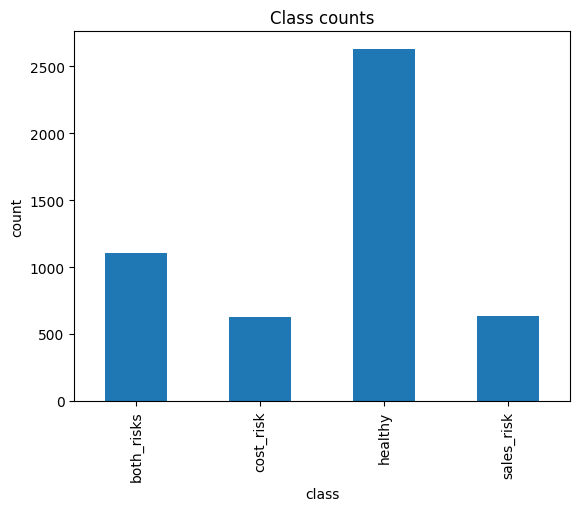

In [4]:
# =========================
# Cell 4 — Class balance (y)
# =========================
class_counts = df["risk [target]"].value_counts().sort_index()

print(class_counts)

plt.figure()
class_counts.plot(kind="bar")
plt.title("Class counts")
plt.xlabel("class")
plt.ylabel("count")
plt.show()

In [5]:
# % Healthy / Sales risk / Cost risk
# (both_risks counts towards both Sales and Cost)

import pandas as pd

# Make sure the mapping exists (skip if you already created it)
df["risk"] = df["y"].map({0: "healthy", 1: "sales_risk", 2: "cost_risk", 3: "both_risks"})

n = len(df)

pct_healthy = (df["risk"] == "healthy").mean() * 100
pct_sales_any = df["risk"].isin(["sales_risk", "both_risks"]).mean() * 100
pct_cost_any  = df["risk"].isin(["cost_risk", "both_risks"]).mean() * 100

summary = pd.DataFrame({
    "group": ["healthy", "sales_risk (incl. both)", "cost_risk (incl. both)"],
    "count": [
        int((df["risk"] == "healthy").sum()),
        int(df["risk"].isin(["sales_risk", "both_risks"]).sum()),
        int(df["risk"].isin(["cost_risk", "both_risks"]).sum()),
    ],
    "percentage": [pct_healthy, pct_sales_any, pct_cost_any],
})

display(summary)

print("\nFull class breakdown (y):")
display(df["risk"].value_counts(normalize=True).mul(100).round(2).rename("percentage").to_frame())


,group,count,percentage
0,healthy,2629,52.58
1,sales_risk (incl. both),1744,34.88
2,cost_risk (incl. both),1734,34.68



Full class breakdown (y):


,percentage
risk,
healthy,52.58
both_risks,22.14
sales_risk,12.74
cost_risk,12.54


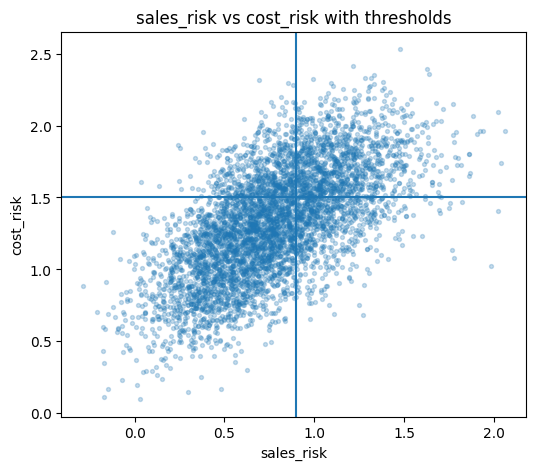

Healthy (%): 52.580000000000005
Below sales threshold (%): 65.12
Below cost threshold (%): 65.32


In [6]:
import matplotlib.pyplot as plt
from risk_dataset_generator import Thresholds

ths = Thresholds()

plt.figure(figsize=(6,5))
plt.scatter(df["sales_risk"], df["cost_risk"], s=8, alpha=0.25)

plt.axvline(ths.t_sales)
plt.axhline(ths.t_cost)

plt.title("sales_risk vs cost_risk with thresholds")
plt.xlabel("sales_risk")
plt.ylabel("cost_risk")
plt.show()

print("Healthy (%):", 100*((df["sales_risk"] < ths.t_sales) & (df["cost_risk"] < ths.t_cost)).mean())
print("Below sales threshold (%):", 100*(df["sales_risk"] < ths.t_sales).mean())
print("Below cost threshold (%):", 100*(df["cost_risk"] < ths.t_cost).mean())

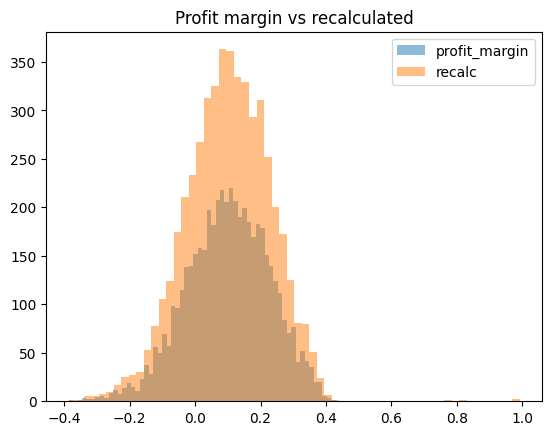

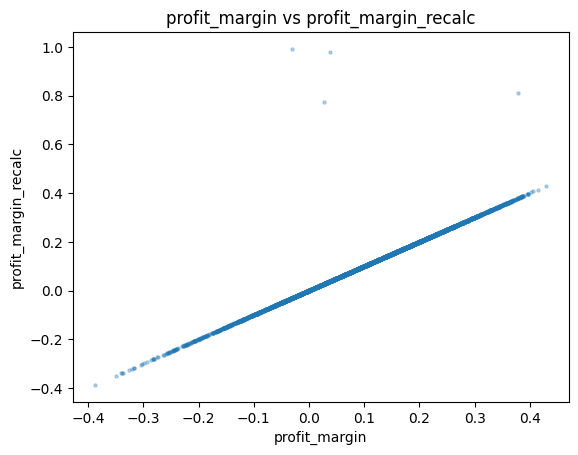

In [7]:
# =========================
# Cell 5 — Check derived margin (should match formula)
# =========================
df_check = df.copy()
df_check["profit_margin_recalc"] = (
    (df_check["annual_revenue_eur"] - df_check["annual_costs_eur"]) / df_check["annual_revenue_eur"].replace(0, np.nan)
)

plt.figure()
plt.hist(df_check["profit_margin"].dropna(), bins=60, alpha=0.5, label="profit_margin")
plt.hist(df_check["profit_margin_recalc"].dropna(), bins=60, alpha=0.5, label="recalc")
plt.title("Profit margin vs recalculated")
plt.legend()
plt.show()

# Scatter check
plt.figure()
plt.scatter(df_check["profit_margin"], df_check["profit_margin_recalc"], s=5, alpha=0.3)
plt.title("profit_margin vs profit_margin_recalc")
plt.xlabel("profit_margin")
plt.ylabel("profit_margin_recalc")
plt.show()

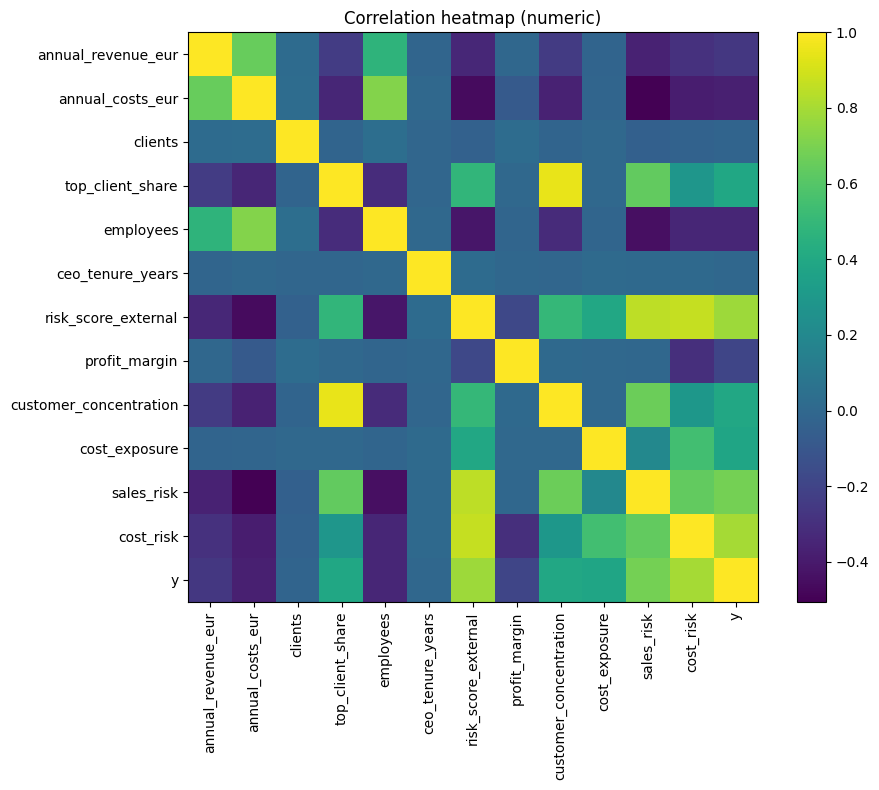

In [8]:
# =========================
# Cell 6 — Correlation heatmap (numeric features only)
# =========================
# Exclude target for this plot, include it separately later
corr_cols = [
    "annual_revenue_eur",
    "annual_costs_eur",
    "clients",
    "top_client_share",
    "employees",
    "ceo_tenure_years",
    "risk_score_external",
    "profit_margin",
    "customer_concentration",
    "cost_exposure",
    "sales_risk",
    "cost_risk",
    "y",
]

corr_cols = [c for c in corr_cols if c in df.columns]

corr = df[corr_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation heatmap (numeric)")
plt.colorbar()
plt.tight_layout()
plt.show()

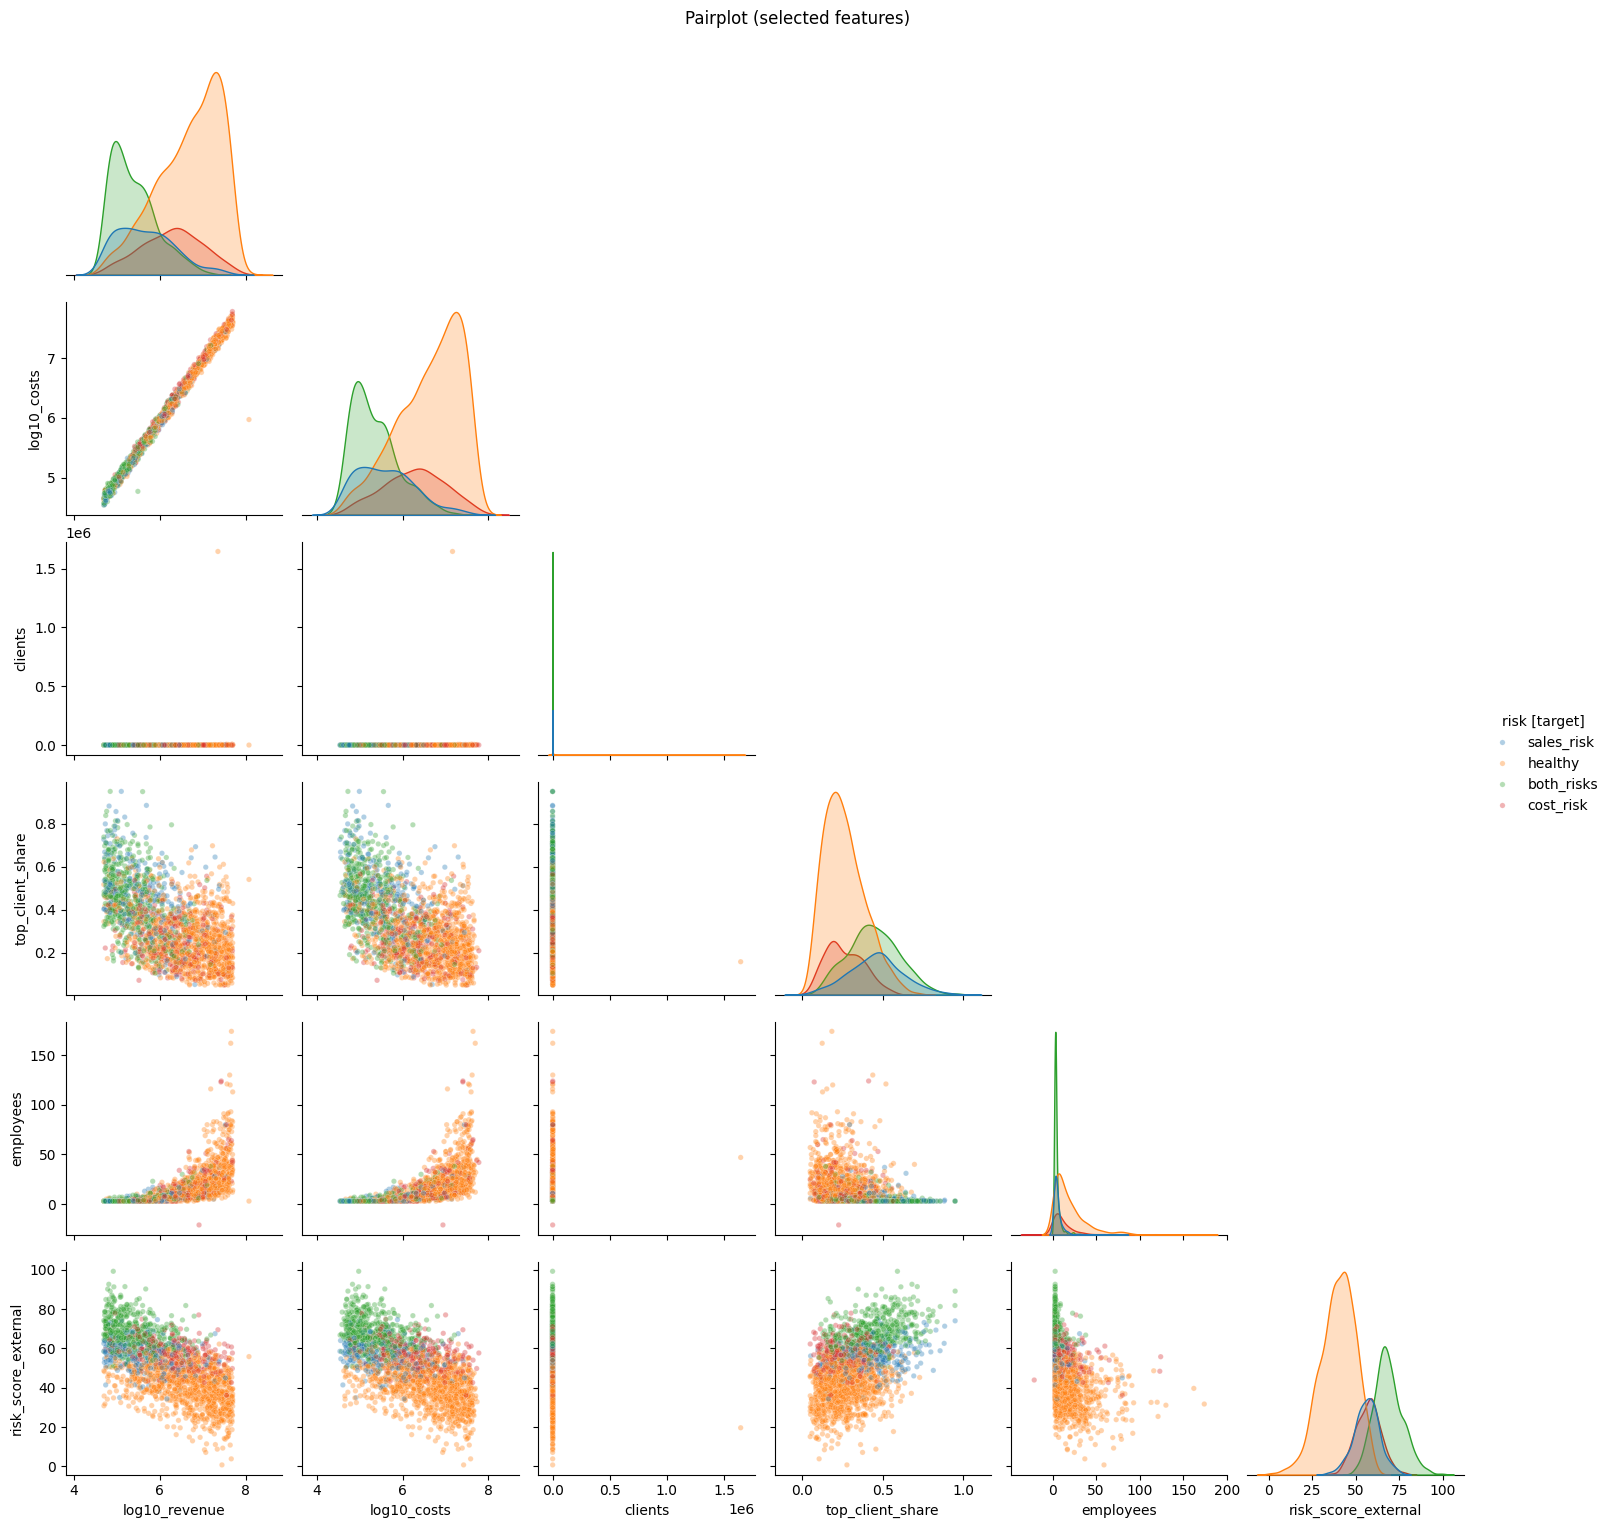

In [9]:
# =========================
# Cell 7 — Pairplot (selected visible features)
# =========================
# Pairplot can be slow; sample
plot_df = df_students.sample(n=min(2000, len(df_students)), random_state=SEED).copy()
# labels = {0: "healthy", 1: "sales_risk", 2: "cost_risk", 3: "both"}
# plot_df["y_label"] = plot_df["y"].map(labels)

# Use log10 revenue/cost to reduce scale dominance
plot_df["log10_revenue"] = np.log10(plot_df["annual_revenue_eur"].clip(lower=1))
plot_df["log10_costs"] = np.log10(plot_df["annual_costs_eur"].clip(lower=1))

sns.pairplot(
    plot_df,
    vars=["log10_revenue", "log10_costs", "clients", "top_client_share", "employees", "risk_score_external"],
    hue="risk [target]",
    corner=True,
    plot_kws={"alpha": 0.35, "s": 15},
)
plt.suptitle("Pairplot (selected features)", y=1.02)
plt.show()

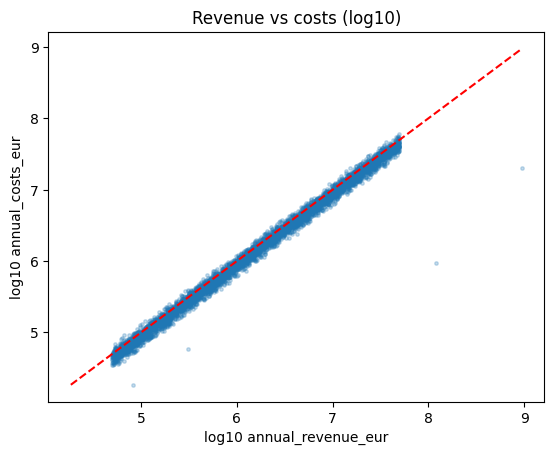

Corr(log10(rev), log10(costs)): 0.9965128064192539


In [10]:
# =========================
# Cell 8 — Revenue vs Costs scatter (should be strongly correlated)
# =========================
plt.figure()
plt.scatter(
    np.log10(df["annual_revenue_eur"].clip(lower=1)),
    np.log10(df["annual_costs_eur"].clip(lower=1)),
    s=6,
    alpha=0.25,
)
# Add identity line
max_val = max(
    np.log10(df["annual_revenue_eur"].clip(lower=1)).max(),
    np.log10(df["annual_costs_eur"].clip(lower=1)).max(),
)
min_val = min(
    np.log10(df["annual_revenue_eur"].clip(lower=1)).min(),
    np.log10(df["annual_costs_eur"].clip(lower=1)).min(),
)
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="y=x")

plt.title("Revenue vs costs (log10)")
plt.xlabel("log10 annual_revenue_eur")
plt.ylabel("log10 annual_costs_eur")
plt.show()

# Correlation value
print("Corr(log10(rev), log10(costs)):",
      np.corrcoef(np.log10(df["annual_revenue_eur"].clip(lower=1)), np.log10(df["annual_costs_eur"].clip(lower=1)))[0, 1])


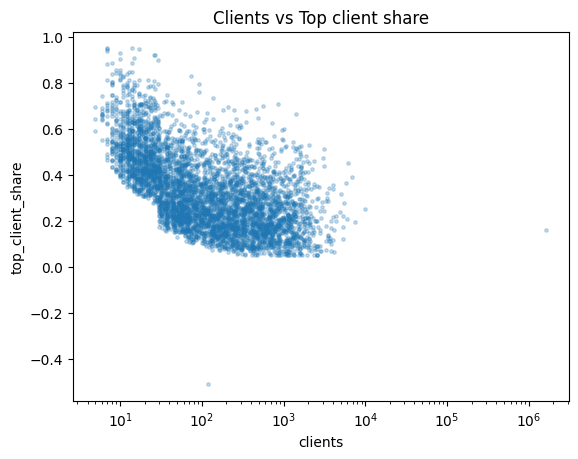

In [11]:
# =========================
# Cell 9 — Clients vs top client share (should be inverse-ish)
# =========================
plt.figure()
plt.scatter(
    df["clients"],
    df["top_client_share"],
    s=6,
    alpha=0.25,
)
plt.title("Clients vs Top client share")
plt.xlabel("clients")
plt.ylabel("top_client_share")
plt.xscale("log")
plt.show()

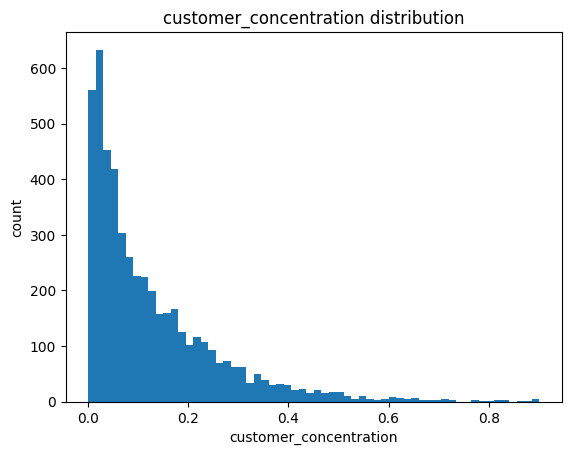

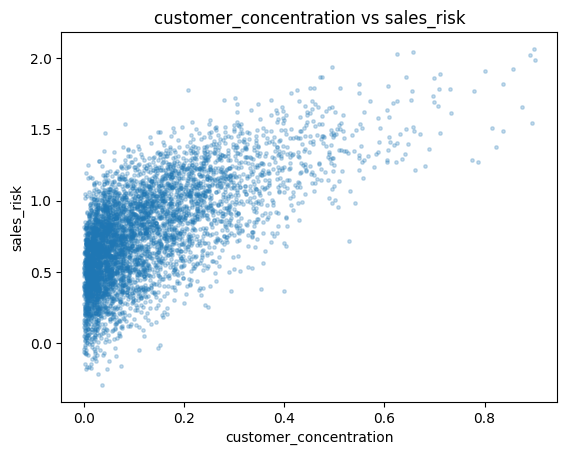

In [12]:
# =========================
# Cell 10 — Customer concentration distribution + relation to sales_risk
# =========================
plt.figure()
plt.hist(df["customer_concentration"].dropna(), bins=60)
plt.title("customer_concentration distribution")
plt.xlabel("customer_concentration")
plt.ylabel("count")
plt.show()

plt.figure()
plt.scatter(df["customer_concentration"], df["sales_risk"], s=6, alpha=0.25)
plt.title("customer_concentration vs sales_risk")
plt.xlabel("customer_concentration")
plt.ylabel("sales_risk")
plt.show()

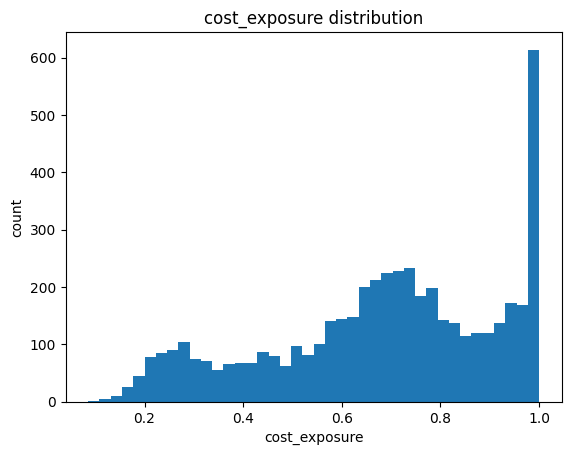

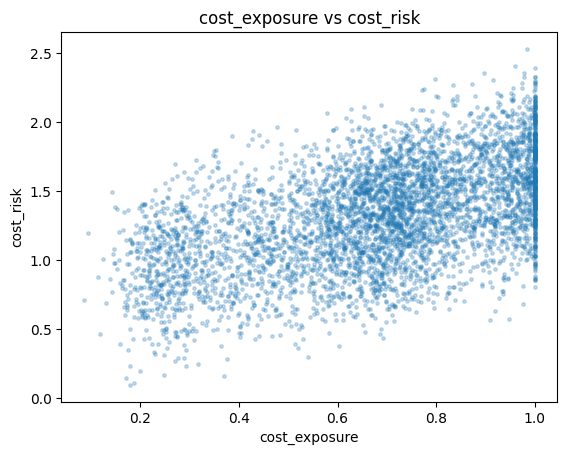

In [13]:
# =========================
# Cell 11 — Cost exposure distribution + relation to cost_risk
# =========================
plt.figure()
plt.hist(df["cost_exposure"].dropna(), bins=40)
plt.title("cost_exposure distribution")
plt.xlabel("cost_exposure")
plt.ylabel("count")
plt.show()

plt.figure()
plt.scatter(df["cost_exposure"], df["cost_risk"], s=6, alpha=0.25)
plt.title("cost_exposure vs cost_risk")
plt.xlabel("cost_exposure")
plt.ylabel("cost_risk")
plt.show()

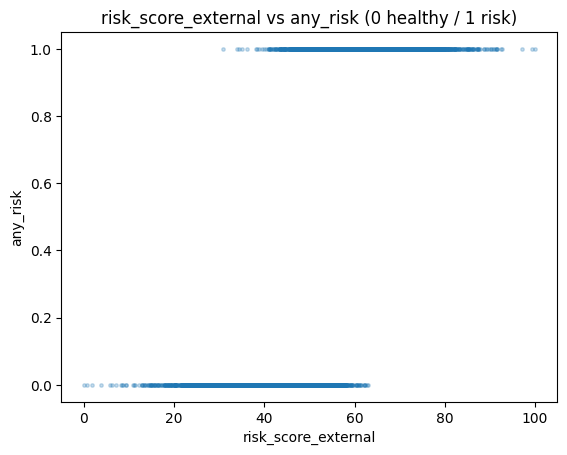

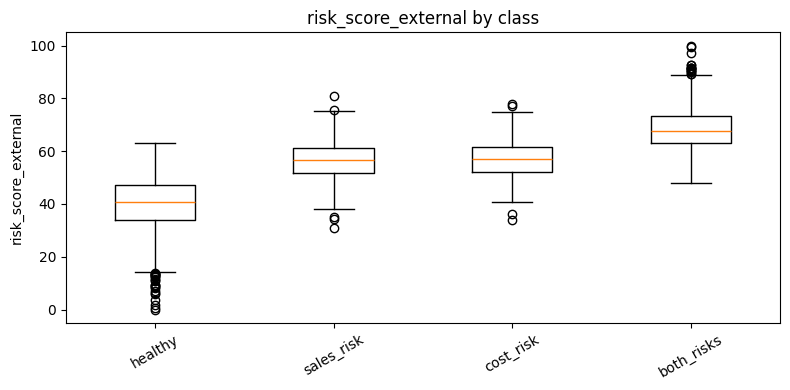

In [14]:
# =========================
# Cell 12 — External risk score: strong for risk/no-risk, weak for class type
# =========================
# Risk/no-risk vs external
risk_any = (df["y"] != 0).astype(int)
labels = {0: "healthy", 1: "sales_risk", 2: "cost_risk", 3: "both_risks"}

plt.figure()
plt.scatter(df["risk_score_external"], risk_any, s=6, alpha=0.25)
plt.title("risk_score_external vs any_risk (0 healthy / 1 risk)")
plt.xlabel("risk_score_external")
plt.ylabel("any_risk")
plt.show()

# Boxplot by class
plt.figure(figsize=(8, 4))
class_order = [0, 1, 2, 3]
data = [df.loc[df["y"] == c, "risk_score_external"].dropna() for c in class_order]
plt.boxplot(data, tick_labels=[labels[c] for c in class_order])
plt.title("risk_score_external by class")
plt.ylabel("risk_score_external")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


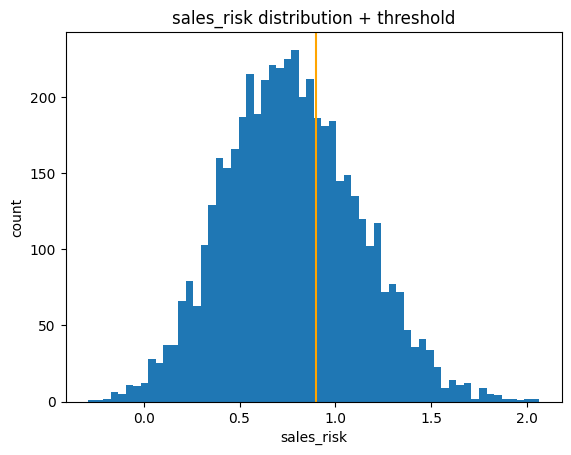

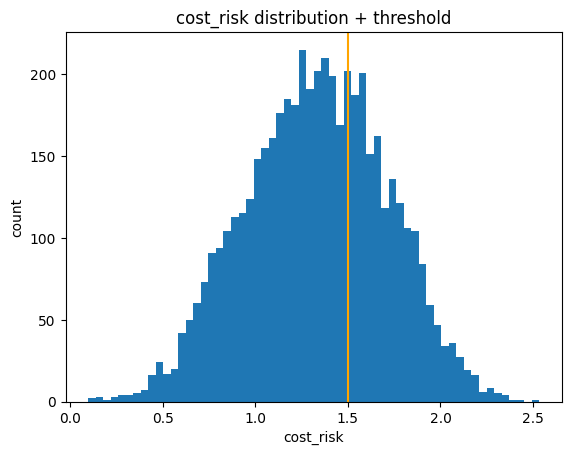

cost_flag,0,1
sales_flag,,
0,2629,627
1,637,1107


In [15]:
# =========================
# Cell 13 — Threshold checks (risk indexes and flags)
# =========================
# Visualize sales_risk and cost_risk histograms with thresholds
from risk_dataset_generator import Thresholds
ths = Thresholds()

plt.figure()
plt.hist(df["sales_risk"].dropna(), bins=60)
plt.axvline(ths.t_sales, color="orange")
plt.title("sales_risk distribution + threshold")
plt.xlabel("sales_risk")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(df["cost_risk"].dropna(), bins=60)
plt.axvline(ths.t_cost, color="orange")
plt.title("cost_risk distribution + threshold")
plt.xlabel("cost_risk")
plt.ylabel("count")
plt.show()

# Confusion-like counts from flags
flag_table = pd.crosstab(df["sales_flag"], df["cost_flag"], rownames=["sales_flag"], colnames=["cost_flag"])
flag_table

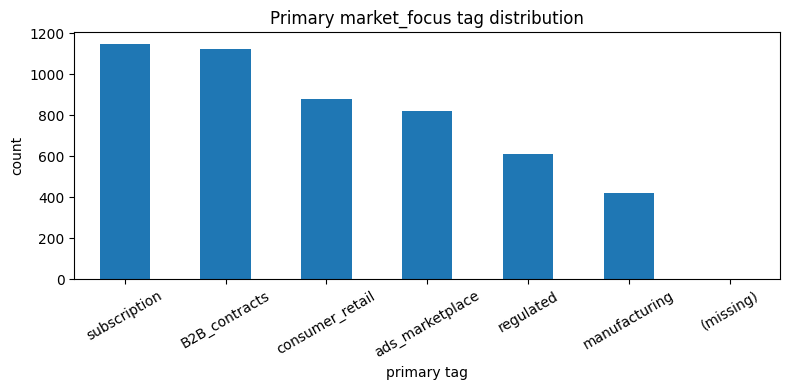

,tag,share,mean_cost_exposure,mean_cost_risk
1,subscription,0.3348,0.454297,1.124959
5,B2B_contracts,0.3254,0.774065,1.402439
4,consumer_retail,0.2924,0.802656,1.433246
3,ads_marketplace,0.2836,0.708012,1.354510
2,regulated,0.2424,0.757351,1.405909
0,manufacturing,0.2082,0.926179,1.548175


In [16]:
# =========================
# Cell 14 — Market focus sanity checks
# =========================
# Distribution of primary tag (first tag)
primary = df_students["market_focus"].apply(lambda x: x[0] if isinstance(x, list) and len(x) else "(missing)")

plt.figure(figsize=(8, 4))
primary.value_counts().plot(kind="bar")
plt.title("Primary market_focus tag distribution")
plt.xlabel("primary tag")
plt.ylabel("count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Average cost_exposure by presence of tags
def has_tag(tag):
    return df["market_focus"].apply(lambda tags: isinstance(tags, list) and (tag in tags))

rows = []
for tag in ["manufacturing", "subscription", "regulated", "ads_marketplace", "consumer_retail", "B2B_contracts"]:
    m = has_tag(tag)
    rows.append({
        "tag": tag,
        "share": float(m.mean()),
        "mean_cost_exposure": float(df.loc[m, "cost_exposure"].mean()),
        "mean_cost_risk": float(df.loc[m, "cost_risk"].mean()),
    })

pd.DataFrame(rows).sort_values("share", ascending=False)

In [17]:
# =========================
# Cell 15 — Outlier inspection
# =========================
# Simple rules to spot corruption
outlier_rules = pd.DataFrame({
    "rev_too_big": df["annual_revenue_eur"] > 5e7,
    "costs_weird": (df["annual_costs_eur"] > 2.5 * df["annual_revenue_eur"]) | (df["annual_costs_eur"] < 0.05 * df["annual_revenue_eur"]),
    "audited_bad": ~pd.to_numeric(df["audited"], errors="coerce").isin([0, 1]) | df["audited"].isna(),
    "clients_bad": (pd.to_numeric(df["clients"], errors="coerce") <= 0) | df["clients"].isna(),
    "top_share_bad": (df["top_client_share"] < 0) | (df["top_client_share"] > 1) | df["top_client_share"].isna(),
})

print("Outlier counts:")
print(outlier_rules.sum().sort_values(ascending=False))

# Show some outlier rows
outlier_any = outlier_rules.any(axis=1)
df.loc[outlier_any].head(20)

Outlier counts:
rev_too_big      2
costs_weird      2
audited_bad      1
top_share_bad    1
clients_bad      0
dtype: int64


,annual_revenue_eur,_profit_margin_raw,annual_costs_eur,size_score,audited,clients,top_client_share,market_focus,employees,ceo_tenure_years,...,customer_concentration,profit_margin,sales_risk,cost_risk,sales_flag,cost_flag,y,risk [target],risk_score_external,risk
735,1.190024e+08,-0.050439,9.369557e+05,0.319633,1.0,27,0.540683,[consumer_retail],3,5.914177,...,0.289313,-0.029959,0.853606,1.451736,0,0,0,healthy,55.855583,healthy
1365,9.447690e+08,0.090171,2.006122e+07,0.773007,1.0,648,0.071464,"[B2B_contracts, subscription]",20,1.470773,...,0.003943,0.037645,-0.176645,0.601734,0,0,0,healthy,14.208040,healthy
2163,1.282389e+06,-0.043002,1.328182e+06,0.369340,1.0,118,-0.511105,[subscription],8,17.322460,...,0.032497,-0.035708,0.246890,0.745931,0,0,0,healthy,32.356155,healthy
4054,2.756395e+06,0.106979,2.466635e+06,0.480114,NaN,67,0.201300,[manufacturing],21,5.894261,...,0.039466,0.105123,0.730125,1.480773,0,0,0,healthy,49.687424,healthy


In [18]:
# =========================
# Cell 16 — Final: student view preview
# =========================
df_students.head(10)

,annual_revenue_eur,annual_costs_eur,audited,clients,top_client_share,market_focus,employees,ceo_tenure_years,risk_score_external,risk [target]
0,4.082113e+06,3.839930e+06,1.0,222,0.168444,"[regulated, ads_marketplace, subscription]",6,16.964128,34.278929,healthy
1,3.231172e+05,2.867766e+05,1.0,13,0.381770,"[ads_marketplace, consumer_retail]",3,13.707732,42.977036,healthy
2,6.651515e+04,3.947734e+04,1.0,12,0.528989,[ads_marketplace],3,3.947865,42.398162,sales_risk
3,5.618015e+04,5.041165e+04,0.0,21,0.710439,"[consumer_retail, subscription]",3,21.328042,71.478452,both_risks
4,1.379783e+07,1.405640e+07,1.0,778,0.239214,"[ads_marketplace, B2B_contracts]",44,14.774588,40.946471,healthy
5,2.743258e+07,2.643738e+07,1.0,560,0.139328,"[subscription, regulated]",30,16.630996,23.257963,healthy
6,3.310605e+06,2.548266e+06,0.0,123,0.596049,"[regulated, B2B_contracts]",14,2.777456,58.495218,sales_risk
7,7.735523e+06,7.463782e+06,1.0,246,0.442265,"[B2B_contracts, ads_marketplace]",8,10.520682,42.581771,healthy
8,2.142274e+06,1.900807e+06,0.0,104,0.102210,[ads_marketplace],8,4.071342,45.848011,healthy
9,3.200496e+07,2.707134e+07,0.0,1377,0.334008,[consumer_retail],36,14.595461,50.980133,healthy
